In [152]:
import os

folder_path = './Downloads/EmailSpamCorpora'
file_texts = []

# loop through all files and folders in the directory
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    
    # check if item is a folder
    if os.path.isdir(item_path):
        # loop through all files in the folder
        for file in os.listdir(item_path):
            file_path = os.path.join(item_path, file)
            
            # check if file is a text file
            if file.endswith('.txt'):
                # read in the text file and append its contents to file_texts
                with open(file_path, 'r') as f:
                    file_texts.append(f.read())


In [153]:
#The os library used for working with file paths and directories
#the chardet library is used for detecting the encoding of text files.

import os
import chardet

# Read in text files with label (include label to check for differences in email of spam and ham)
path = './Downloads/EmailSpamCorpora/corpus'
file_texts = []
labels = []
for folder in os.listdir(path):
    new_path = os.path.join(path, folder) + "/"
    label = folder
    #print(new_path)
    for f in os.listdir(new_path):
        if f.endswith('.txt'):
            with open(os.path.join(new_path, f), 'rb') as file:
                rawdata = file.read()
                encoding = chardet.detect(rawdata)['encoding']
                
            for enc in ['utf-8', 'latin-1']:
                try:
                    with open(os.path.join(new_path, f), "r", encoding=enc) as file:
                        txt = file.read()
                        file_texts.append(txt)
                        labels.append(label)
                    break
                except UnicodeDecodeError:
                    pass

print(len(labels))
print(len(file_texts))


5172
5172


In [192]:
# Create dataframe
import pandas as pd
txtdict = {'label': labels, 'text': file_texts}
spamdf = pd.DataFrame(data=txtdict)
spamdf.head()

,label,text
0,ham,Subject: christmas tree farm pictures\n
1,ham,"Subject: vastar resources , inc .\ngary , prod..."
2,ham,Subject: calpine daily gas nomination\n- calpi...
3,ham,Subject: re : issue\nfyi - see note below - al...
4,ham,Subject: meter 7268 nov allocation\nfyi .\n- -...


In [155]:
print(len(spamdf[spamdf.label=='ham']))
print(len(spamdf[spamdf.label=='spam']))

3672
1500


In [156]:
# calculate the average character count for rows with label 'ham'
avg_char_count_ham = spamdf[spamdf.label == 'ham']['text'].str.len().mean()

# calculate the average character count for rows with label 'spam'
avg_char_count_spam = spamdf[spamdf.label == 'spam']['text'].str.len().mean()

# print the results
print(f"Average character count for ham messages: {avg_char_count_ham}")
print(f"Average character count for spam messages: {avg_char_count_spam}")


Average character count for ham messages: 959.3929738562091
Average character count for spam messages: 1203.644


In [157]:
# Check for duplicates in case of error
spamdf.drop_duplicates(inplace=True)
len(spamdf) # no duplicates

4994

<AxesSubplot:xlabel='label', ylabel='count'>

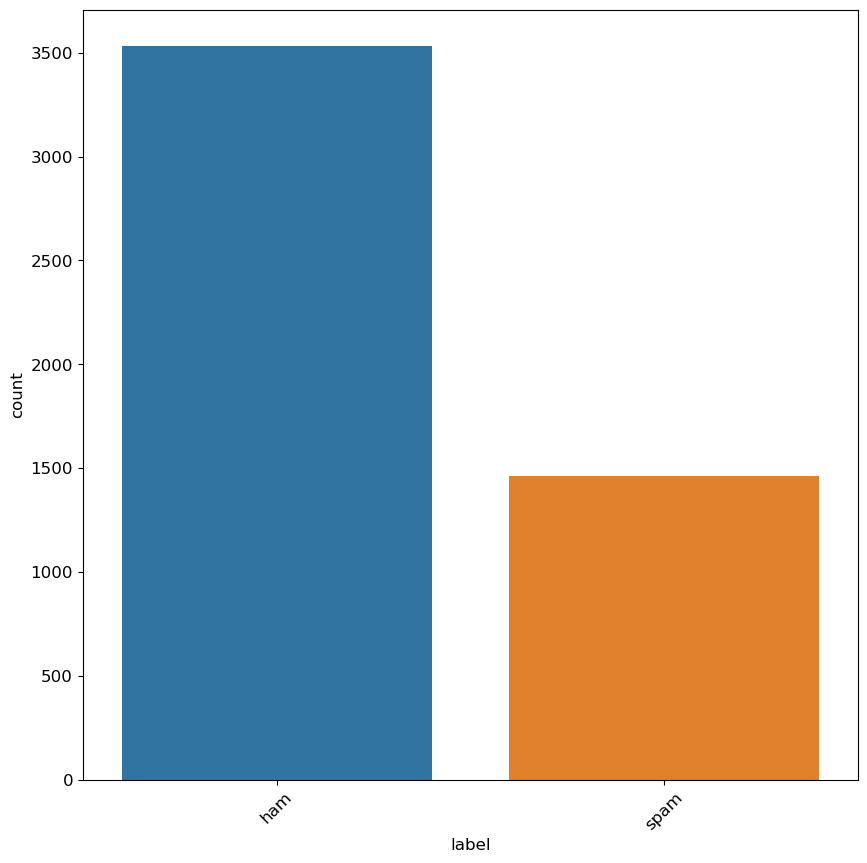

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Plot totals for each label
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 12})
plt.xticks(rotation=45)


spam_grouped = spamdf.groupby(by=['label']).count().sort_values(by=['text'], ascending=False).reset_index()
spam_grouped = spam_grouped.rename(columns={'text':'count'})
sns.barplot(x='label', y='count', data=spam_grouped)

In [159]:
import plotly.express as px

# group the dataframe by label and count the number of occurrences
spam_grouped = spamdf.groupby(by=['label']).count().sort_values(by=['text'], ascending=False).reset_index()
spam_grouped = spam_grouped.rename(columns={'text':'count'})

# create a bar chart using Plotly Express
fig = px.bar(spam_grouped, x='label', y='count')

# customize the chart layout and labels
fig.update_layout(title='Label Counts',
                  xaxis_title='Label',
                  yaxis_title='Count',
                  xaxis_tickangle=-45)

# display the chart
fig.show()


In [160]:
dfs=spamdf_1.copy()

In [161]:
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
dfs['polarity'] = dfs['text'].apply(get_sentiment).apply(pd.Series)


In [162]:
def classify_polarity(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

dfs['sentiment'] = dfs['polarity'].apply(classify_polarity)


In [163]:
# Group the DataFrame by label and sentiment
grouped_df = dfs.groupby(['label', 'sentiment'])

# Get the count of each sentiment for each label
sentiment_counts = grouped_df.size()

# Print the sentiment counts
print(sentiment_counts)
#0= ham #1=spam


label  sentiment
0      Negative      672
       Neutral       780
       Positive     1975
1      Negative      145
       Neutral       177
       Positive     1137
dtype: int64


In [167]:
# Import the TextBlob library
from textblob import TextBlob

# Define a function to perform subjectivity analysis on a text using TextBlob
def get_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

# Apply the subjectivity function to the 'text' column of the DataFrame
dfs['subjectivity'] = dfs['text'].apply(get_subjectivity).apply(pd.Series)


In [169]:
#Create a function to compute the negative neutral and positive analysis
def classify_subjectivity(score):
    if score <.5:
        return 'Objective'
    elif score==.5:
        return 'Neutral'
    else:
        return'Subjective'
dfs['subjectivity'] = dfs['subjectivity'].apply(classify_subjectivity)


In [170]:
# Group the DataFrame by label and subjectivity
grouped_dfs = dfs.groupby(['label', 'subjectivity'])

# Get the count of each subjectivity for each label
subjectivity_counts = grouped_dfs.size()

# Print the subjectivity counts
print(subjectivity_counts)

label  subjectivity
0      Neutral           31
       Objective       2899
       Subjective       497
1      Neutral           28
       Objective       1012
       Subjective       419
dtype: int64


In [34]:
spamdf.head()

,label,text
0,ham,Subject: christmas tree farm pictures\n
1,ham,"Subject: vastar resources , inc .\ngary , prod..."
2,ham,Subject: calpine daily gas nomination\n- calpi...
3,ham,Subject: re : issue\nfyi - see note below - al...
4,ham,Subject: meter 7268 nov allocation\nfyi .\n- -...


In [193]:
# Clean up 'Subject' from text column (EX: 'Subject: christmas' --> 'christmas')
spamdf['text'] = spamdf['text'].str.replace('Subject:', '')
spamdf.head()

,label,text
0,ham,christmas tree farm pictures\n
1,ham,"vastar resources , inc .\ngary , production f..."
2,ham,calpine daily gas nomination\n- calpine daily...
3,ham,re : issue\nfyi - see note below - already do...
4,ham,meter 7268 nov allocation\nfyi .\n- - - - - -...


In [194]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
#Define a function to clean and tokenize the email corpus.
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+|http\S+", '', text)
    text = re.sub(r'[^\w\s]','', text)
    text = re.sub(r'\d+', '', text) 
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [195]:
spamdf['text']=spamdf['text'].apply(data_processing)

In [196]:
spamdf_1=spamdf.copy()

In [197]:
stemmer=PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data ]
    return data

In [198]:
spamdf_1['text']=spamdf_1['text'].apply(stemming)

In [199]:
spamdf_1.head()

,label,text
0,ham,christmas tree farm pictures
1,ham,vastar resources inc gary production high isla...
2,ham,calpine daily gas nomination calpine daily gas...
3,ham,issue fyi see note already done stella forward...
4,ham,meter nov allocation fyi forwarded lauri allen...


In [201]:
spamdf_1.drop_duplicates(inplace=True)


C:\Users\lmori\AppData\Local\Temp\ipykernel_4336\2069678528.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Label')

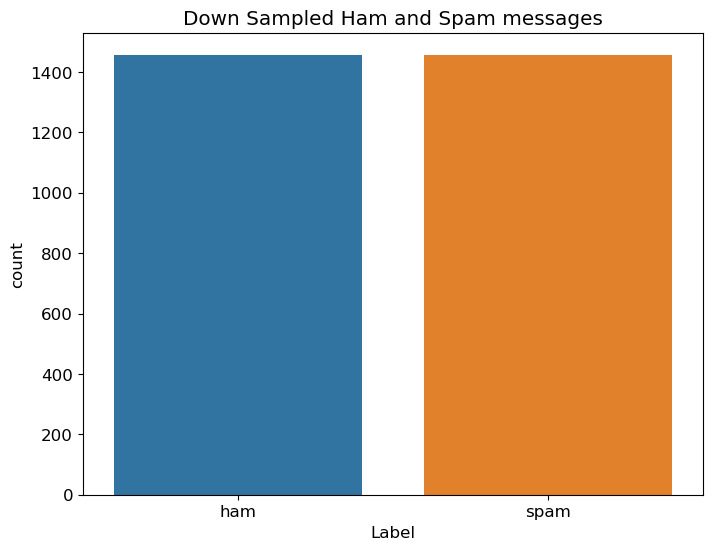

In [202]:
# Downsampling to balance the dataset
ham_msg = spamdf_1[spamdf_1.label == 'ham']
spam_msg = spamdf_1[spamdf_1.label == 'spam']
ham_msg_dn = ham_msg.sample(n = len(spam_msg), random_state=42)
 
# Plotting the counts of down sampled dataset
balanced_data = ham_msg_dn.append(spam_msg).reset_index(drop = True)
plt.figure(figsize = (8, 6))
sns.countplot(balanced_data.label)
plt.title('Down Sampled Ham and Spam messages')
plt.xlabel('Label')

In [203]:
spam_count = spamdf_1['label'].value_counts()['spam']
ham_count = spamdf_1['label'].value_counts()['ham']

print("Number of spam messages:", spam_count)
print("Number of ham messages:", ham_count)

Number of spam messages: 1457
Number of ham messages: 3174


C:\Users\lmori\AppData\Local\Temp\ipykernel_4336\3571296521.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Label')

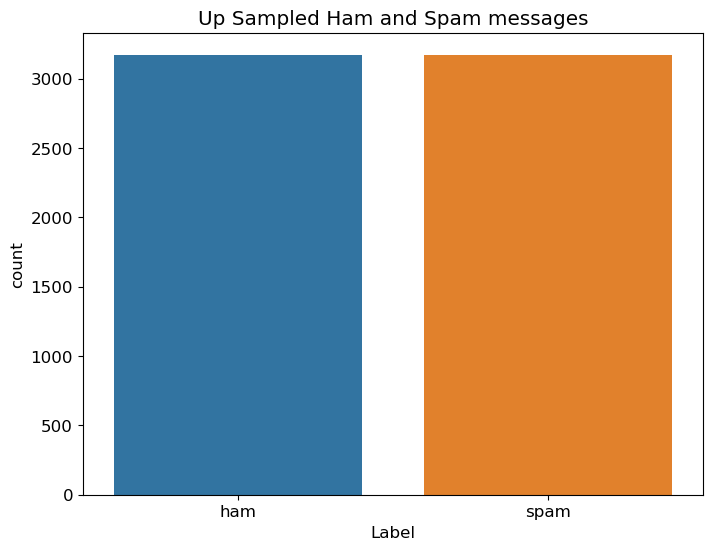

In [204]:
# Upsampling to balance the dataset
ham_msg1 = spamdf_1[spamdf_1.label == 'ham']
spam_msg1 = spamdf_1[spamdf_1.label == 'spam']
spam_msg1_up = spam_msg1.sample(n=len(ham_msg),replace=True, random_state=42)
 
# Plotting the counts of up sampled dataset
balanced_data2 = ham_msg1.append(spam_msg1_up).reset_index(drop = True)
plt.figure(figsize = (8, 6))
sns.countplot(balanced_data2.label)
plt.title('Up Sampled Ham and Spam messages')
plt.xlabel('Label')

In [29]:
len(spamdf_1) # no duplicates

4886

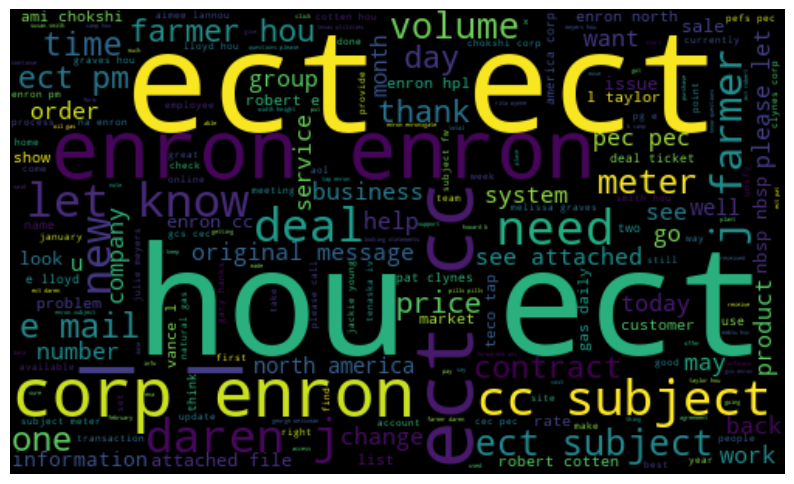

In [205]:
from wordcloud import WordCloud

allwords= " ".join([emails for emails in spamdf_1['text']])
WordCloud=WordCloud(width=500, height=300, random_state=21,max_font_size=97).generate(allwords)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()   

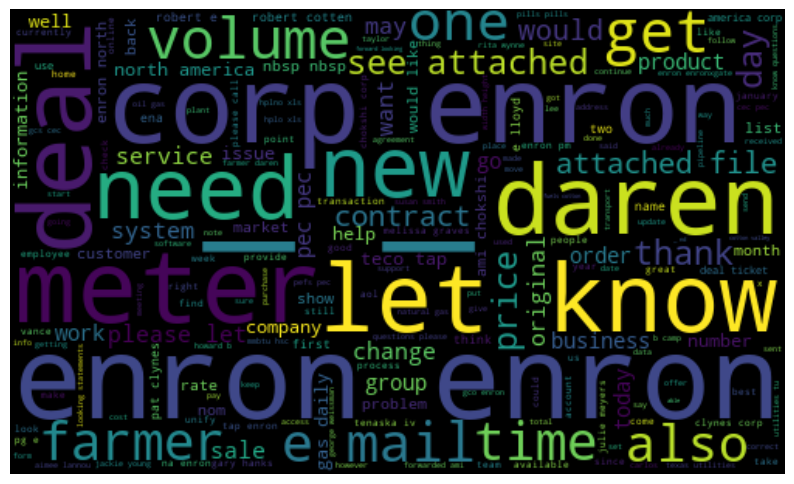

In [41]:
from wordcloud import WordCloud

# Define your custom stop words as a set
sw_additions = set(["email", "spam", "message", "click", "link",'http','www','hou','com', 
                    'cc', 'ect','etc', 'bcc', 'j','l','u','1','hpl','subject'])

# Combine the custom stop words with the default set of stop words
nltk_stopwords=nltk.corpus.stopwords.words('english')
stopwords= nltk_stopwords + list(sw_additions)


allwords= " ".join([emails for emails in spamdf_1['text']])
WordCloud2=WordCloud(width=500, height=300, random_state=21,max_font_size=97,stopwords=stopwords).generate(allwords)

plt.imshow(WordCloud2, interpolation='bilinear')
plt.axis('off')
plt.show()   

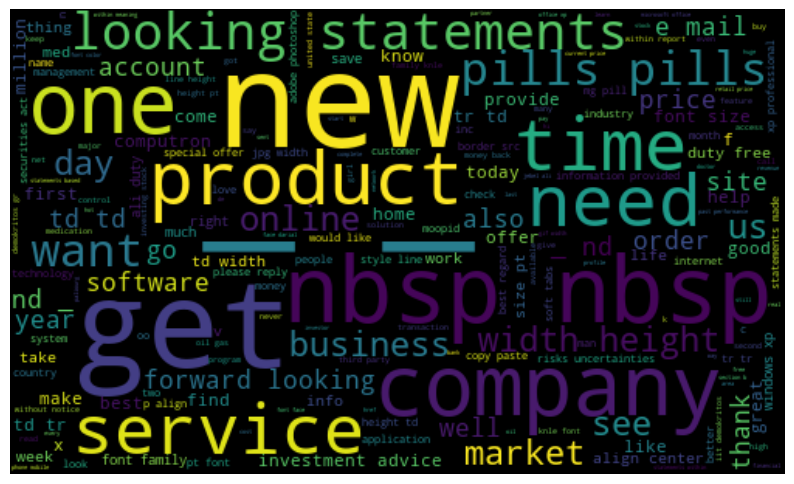

In [59]:
# Define your custom stop words as a set
sw_additions = set(["email", "spam", "message", "click", "link",'http','www','com', 
                    'cc','etc', 'bcc', 'j','l','u','1','subject'])

# Combine the custom stop words with the default set of stop words
nltk_stopwords=nltk.corpus.stopwords.words('english')
stopwords= nltk_stopwords + list(sw_additions)


spamwords= " ".join([emails for emails in spamdf_1[spamdf_1['label']=="spam"]['text']])
WordCloud2=WordCloud(width=500, height=300, random_state=21,max_font_size=97,stopwords=stopwords).generate(spamwords)

plt.imshow(WordCloud2, interpolation='bilinear')
plt.axis('off')
plt.show()   

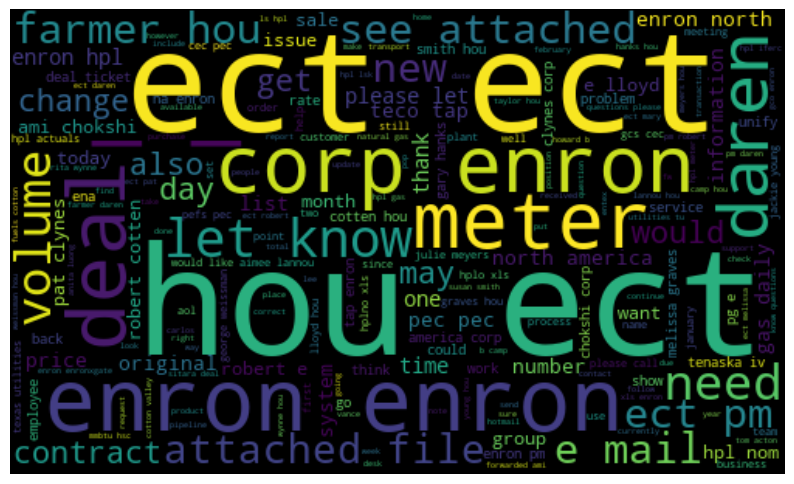

In [60]:
# Define your custom stop words as a set
sw_additions = set(["email", "spam", "message", "click", "link",'http','www','com', 
                    'cc','etc', 'bcc', 'j','l','u','1','subject'])

# Combine the custom stop words with the default set of stop words
nltk_stopwords=nltk.corpus.stopwords.words('english')
stopwords= nltk_stopwords + list(sw_additions)


hamwords= " ".join([emails for emails in spamdf_1[spamdf_1['label']=="ham"]['text']])
WordCloud2=WordCloud(width=500, height=300, random_state=21,max_font_size=97,stopwords=stopwords).generate(hamwords)

plt.imshow(WordCloud2, interpolation='bilinear')
plt.axis('off')
plt.show()   

In [61]:
balanced_data2.head()

,label,text
0,ham,christmas tree farm pictures
1,ham,vastar resources inc gary production high isla...
2,ham,calpine daily gas nomination calpine daily gas...
3,ham,issue fyi see note already done stella forward...
4,ham,meter 7268 nov allocation fyi forwarded lauri ...


In [62]:

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import  GridSearchCV
from sklearn.naive_bayes import MultinomialNB
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import cross_val_score

X=balanced_data['text']
X1=balanced_data2['text']
y=balanced_data['label']
y1=balanced_data2['label']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=21)


In [64]:
# sklearn contains two vectorizers

# CountVectorizer can give you Boolean or TF vectors
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# TfidfVectorizer can give you TF or TFIDF vectors
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#  unigram boolean vectorizer, set minimum document frequency to 5
uni_bol_vec = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')
uni_bol_vec1 = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')

#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
bicount_vec = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')
bicount_vec1 = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')

#  unigram tfidf vectorizer, set minimum document frequency to 5
uni_tfidf = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')
uni_tfidf1 = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')


In [65]:
# The vectorizer can do "fit" and "transform"
# fit is a process to collect unique tokens into the vocabulary
# transform is a process to convert each document to vector based on the vocabulary
# These two processes can be done together using fit_transform(), or used individually: fit() or transform()

# fit vocabulary in training documents and transform the training documents into vectors
X_train_vec = uni_bol_vec.fit_transform(X_train)
X1_train_vec = uni_bol_vec1.fit_transform(X1_train)
X_train_vec_bigram = bicount_vec.fit_transform(X_train)
X1_train_vec_bigram = bicount_vec1.fit_transform(X1_train)
X_train_vec_tfidf = uni_tfidf.fit_transform(X_train)
X1_train_vec_tfidf = uni_tfidf1.fit_transform(X1_train)


# check the content of a document vector
print(X_train_vec[0].toarray())

# check the size of the constructed vocabulary
print(len(uni_bol_vec.vocabulary_))
print(len(uni_bol_vec1.vocabulary_))

print(X_train_vec.shape)
print(X1_train_vec.shape)
print(X_train_vec_bigram.shape)
print(X1_train_vec_bigram.shape)
print(X_train_vec_tfidf.shape)
print(X1_train_vec_tfidf.shape)


[[0 0 0 ... 0 0 0]]
4715
11162
(2042, 4715)
(4797, 11162)
(2042, 7855)
(4797, 24007)
(2042, 4715)
(4797, 11162)


In [66]:
# this step is the same as the NB script

# use the vocabulary constructed from the training data to vectorize the test data. 
# Therefore, use "transform" only, not "fit_transform", 
# otherwise "fit" would generate a new vocabulary from the test data

X_test_vec = uni_bol_vec.transform(X_test)
X1_test_vec = uni_bol_vec1.transform(X1_test)
X_test_vec_bigram = bicount_vec.transform(X_test)
X1_test_vec_bigram = bicount_vec1.transform(X1_test)
X_test_vec_tfidf = uni_tfidf.transform(X_test)
X1_test_vec_tfidf = uni_tfidf1.transform(X1_test)

# print out #examples and #features in the test set
print(X_test_vec.shape)
print(X1_test_vec.shape)
print(X_test_vec_bigram.shape)
print(X1_test_vec_bigram.shape)
print(X_test_vec_tfidf.shape)
print(X1_test_vec_tfidf.shape)

(876, 4715)
(2057, 11162)
(876, 7855)
(2057, 24007)
(876, 4715)
(2057, 11162)


## Train a LinearSVC classifier

In [67]:
# import the LinearSVC module
from sklearn.svm import LinearSVC

# initialize the LinearSVC model and set parameters
svm_clf = LinearSVC(C=1,max_iter=5000)
# use the training data to train the model
svm_clf.fit(X_train_vec,y_train)
# test the classifier on the test data set, print accuracy score

svm_clf.score(X_test_vec,y_test)


0.9726027397260274

In [68]:
# import the LinearSVC module
from sklearn.svm import LinearSVC
svm_clf1 = LinearSVC(C=1,max_iter=5000)
svm_clf1.fit(X1_train_vec,y1_train)
svm_clf1.score(X1_test_vec,y1_test)

0.9868740884783666

In [69]:
# import the LinearSVC module
from sklearn.svm import LinearSVC
svm_clf2 = LinearSVC(C=1,max_iter=50000)
svm_clf2.fit(X_train_vec_bigram,y_train)
svm_clf2.score(X_test_vec_bigram,y_test)

0.9703196347031964

In [70]:
# import the LinearSVC module
from sklearn.svm import LinearSVC
svm_clf3 = LinearSVC(C=1,max_iter=50000)
svm_clf3.fit(X1_train_vec_bigram,y1_train)
svm_clf3.score(X1_test_vec_bigram,y1_test)

0.9844433641225085

In [71]:
# import the LinearSVC module
from sklearn.svm import LinearSVC
svm_clf4 = LinearSVC(C=1,max_iter=50000)
svm_clf4.fit(X_train_vec_tfidf,y_train)
svm_clf4.score(X_test_vec_tfidf,y_test)

0.9874429223744292

In [72]:
# import the LinearSVC module
from sklearn.svm import LinearSVC
svm_clf5 = LinearSVC(C=1,max_iter=50000)
svm_clf5.fit(X1_train_vec_tfidf,y1_train)
svm_clf5.score(X1_test_vec_tfidf,y1_test)

0.9917355371900827

In [73]:
# test the classifier on the test data set and report accuracy
y_pred = svm_clf4.predict(X_test_vec_tfidf)
print("Test Set Classification Report of DownSample \n Liner SVC with unigram TF-IDF vectorizer")
print(classification_report(y_test, y_pred))

Test Set Classification Report of DownSample 
 Liner SVC with unigram TF-IDF vectorizer
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       429
        spam       0.98      1.00      0.99       447

    accuracy                           0.99       876
   macro avg       0.99      0.99      0.99       876
weighted avg       0.99      0.99      0.99       876



In [74]:
# test the classifier on the test data set and report accuracy
y_pred1 = svm_clf5.predict(X1_test_vec_tfidf)
print("Test Set Classification Report of UpSample \n Liner SVC with unigram TF-IDF vectorizer")
print(classification_report(y1_test, y_pred1))

Test Set Classification Report of UpSample 
 Liner SVC with unigram TF-IDF vectorizer
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1028
        spam       0.98      1.00      0.99      1029

    accuracy                           0.99      2057
   macro avg       0.99      0.99      0.99      2057
weighted avg       0.99      0.99      0.99      2057



In [75]:
# set the parameters to search
parameters = {'C': [0.01, 0.1, 1, 10]}

# use grid search to find the best parameters for the model
grid_search = GridSearchCV(svm_clf, parameters, cv=10)
grid_search.fit(X_train_vec, y_train)

# print the best parameters and their score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'C': 0.1}
Best score:  0.969155906264945


In [76]:
# set the parameters to search
parameters = {'C': [0.01, 0.1, 1, 10]}

# use grid search to find the best parameters for the model
grid_search1 = GridSearchCV(svm_clf1, parameters, cv=10)
grid_search1.fit(X1_train_vec, y1_train)

# print the best parameters and their score
print("Best parameters: ", grid_search1.best_params_)
print("Best score: ", grid_search1.best_score_)


C:\Users\lmori\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\lmori\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\lmori\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\lmori\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\lmori\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Users\lmori\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed

Best parameters:  {'C': 0.1}
Best score:  0.9851996346555323


C:\Users\lmori\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [77]:
# set the parameters to search
parameters = {'C': [0.01, 0.1, 1, 10]}

# use grid search to find the best parameters for the model
grid_search2 = GridSearchCV(svm_clf2, parameters, cv=10)
grid_search2.fit(X_train_vec_bigram, y_train)

# print the best parameters and their score
print("Best parameters: ", grid_search2.best_params_)
print("Best score: ", grid_search2.best_score_)


Best parameters:  {'C': 0.01}
Best score:  0.9598613103778095


In [78]:
# set the parameters to search
parameters = {'C': [0.01, 0.1, 1, 10]}

# use grid search to find the best parameters for the model
grid_search3 = GridSearchCV(svm_clf3, parameters, cv=10)
grid_search3.fit(X1_train_vec_bigram, y1_train)

# print the best parameters and their score
print("Best parameters: ", grid_search3.best_params_)
print("Best score: ", grid_search3.best_score_)


Best parameters:  {'C': 0.1}
Best score:  0.9837386917188586


In [79]:
# set the parameters to search
parameters = {'C': [0.01, 0.1, 1, 10]}

# use grid search to find the best parameters for the model
grid_search4 = GridSearchCV(svm_clf4, parameters, cv=10)
grid_search4.fit(X_train_vec_tfidf, y_train)

# print the best parameters and their score
print("Best parameters: ", grid_search4.best_params_)
print("Best score: ", grid_search4.best_score_)


Best parameters:  {'C': 1}
Best score:  0.9755212816834051


In [80]:
# set the parameters to search
parameters = {'C': [0.01, 0.1, 1, 10]}

# use grid search to find the best parameters for the model
# with 10 Fold Cross Validation 
grid_search5 = GridSearchCV(svm_clf5, parameters, cv=10)
grid_search5.fit(X1_train_vec_tfidf, y1_train)

# print the best parameters and their score
print("Best parameters: ", grid_search5.best_params_)
print("Best score: ", grid_search5.best_score_)


Best parameters:  {'C': 1}
Best score:  0.9906189109255393


In [81]:
# initialize the LinearSVC model with the best parameters
svm_clf_best = LinearSVC(C=grid_search.best_params_['C'])
# use the entire training dataset to train the model
svm_clf_best.fit(X_train_vec, y_train)
# test the classifier on the test data set and report accuracy
y_pred_best = svm_clf_best.predict(X_test_vec)
print("Test set classification report for 1st vectorizer")
print(classification_report(y_test, y_pred_best))

Test set classification report for 1st vectorizer
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       429
        spam       0.97      0.99      0.98       447

    accuracy                           0.98       876
   macro avg       0.98      0.98      0.98       876
weighted avg       0.98      0.98      0.98       876



In [82]:
# initialize the LinearSVC model with the best parameters
svm_clf1_best = LinearSVC(C=grid_search1.best_params_['C'])
# use the entire training dataset to train the model
svm_clf1_best.fit(X1_train_vec, y1_train)
# test the classifier on the test data set and report accuracy
y_pred_best1 = svm_clf1_best.predict(X1_test_vec)
print("Test set classification report")
print(classification_report(y1_test, y_pred_best1))

Test set classification report
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1028
        spam       0.98      1.00      0.99      1029

    accuracy                           0.99      2057
   macro avg       0.99      0.99      0.99      2057
weighted avg       0.99      0.99      0.99      2057



In [83]:
# initialize the LinearSVC model with the best parameters
svm_clf2_best = LinearSVC(C=grid_search2.best_params_['C'])
# use the entire training dataset to train the model
svm_clf2_best.fit(X_train_vec_bigram, y_train)
# test the classifier on the test data set and report accuracy
y_pred_best2 = svm_clf2_best.predict(X_test_vec_bigram)
print("Test set classification report for 1st vectorizer")
print(classification_report(y_test, y_pred_best2))

Test set classification report for 1st vectorizer
              precision    recall  f1-score   support

         ham       1.00      0.95      0.97       429
        spam       0.95      1.00      0.97       447

    accuracy                           0.97       876
   macro avg       0.98      0.97      0.97       876
weighted avg       0.97      0.97      0.97       876



In [84]:
# initialize the LinearSVC model with the best parameters
svm_clf3_best = LinearSVC(C=grid_search3.best_params_['C'])
# use the entire training dataset to train the model
svm_clf3_best.fit(X1_train_vec_bigram, y1_train)
# test the classifier on the test data set and report accuracy
y_pred_best3 = svm_clf3_best.predict(X1_test_vec_bigram)
print("Test set classification report")
print(classification_report(y1_test, y_pred_best3))

Test set classification report
              precision    recall  f1-score   support

         ham       1.00      0.97      0.99      1028
        spam       0.98      1.00      0.99      1029

    accuracy                           0.99      2057
   macro avg       0.99      0.99      0.99      2057
weighted avg       0.99      0.99      0.99      2057



C:\Users\lmori\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



## Train a MNB classifier

In [85]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf= MultinomialNB()

# use the training data to train the MNB model
nb_clf.fit(X_train_vec,y_train)
# test the classifier on the test data set, print accuracy score
nb_clf.score(X_test_vec,y_test)

0.9668949771689498

In [86]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf1= MultinomialNB()

# use the training data to train the MNB model
nb_clf1.fit(X1_train_vec,y1_train)
# test the classifier on the test data set, print accuracy score
nb_clf1.score(X1_test_vec,y1_test)

0.9756927564414195

In [87]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf2= MultinomialNB()

# use the training data to train the MNB model
nb_clf2.fit(X_train_vec_bigram,y_train)
# test the classifier on the test data set, print accuracy score
nb_clf2.score(X_test_vec_bigram,y_test)

0.9714611872146118

In [88]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf3= MultinomialNB()

# use the training data to train the MNB model
nb_clf3.fit(X1_train_vec_bigram,y1_train)
# test the classifier on the test data set, print accuracy score
nb_clf3.score(X1_test_vec_bigram,y1_test)

0.9805542051531356

In [89]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf4= MultinomialNB()

# use the training data to train the MNB model
nb_clf4.fit(X_train_vec_tfidf,y_train)
# test the classifier on the test data set, print accuracy score
nb_clf4.score(X_test_vec_tfidf,y_test)

0.9680365296803652

In [90]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf5= MultinomialNB()

# use the training data to train the MNB model
nb_clf5.fit(X1_train_vec_tfidf,y1_train)
# test the classifier on the test data set, print accuracy score
nb_clf5.score(X1_test_vec_tfidf,y1_test)

0.9742343218279047

In [206]:
y_pred4 = nb_clf1.predict(X1_test_vec)
target_names = ['ham=0','spam=1']
print(classification_report(y1_test, y_pred4, target_names=target_names))

              precision    recall  f1-score   support

       ham=0       0.98      0.97      0.98      1028
      spam=1       0.97      0.98      0.98      1029

    accuracy                           0.98      2057
   macro avg       0.98      0.98      0.98      2057
weighted avg       0.98      0.98      0.98      2057



In [92]:
y_pred3 = nb_clf3.predict(X1_test_vec_bigram)
target_names = ['ham=0','spam=1']
print(classification_report(y1_test, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

       ham=0       0.99      0.97      0.98      1028
      spam=1       0.97      0.99      0.98      1029

    accuracy                           0.98      2057
   macro avg       0.98      0.98      0.98      2057
weighted avg       0.98      0.98      0.98      2057



In [93]:
y_test.head()

286      ham
119      ham
2770    spam
957      ham
2601    spam
Name: label, dtype: object

In [94]:
print(y_pred[0])

# check the actual label for the first test example
print(y_test[286])

ham
ham


## Test on Outside Data Sets

In [95]:
#The os library used for working with file paths and directories
#the chardet library is used for detecting the encoding of text files.

import os
import chardet

# Read in text files with label (include label to check for differences in email of spam and ham)
path = './Downloads/enron2/'
file_texts1 = []
labels1 = []
for folder in os.listdir(path):
    new_path1 = os.path.join(path, folder) + "/"
    label = folder
    for f in os.listdir(new_path1):
        if f.endswith('.txt'):
            try:
                with open(os.path.join(new_path1, f), 'rb') as file:
                    rawdata = file.read()
                    encoding = chardet.detect(rawdata)['encoding']
                    with open(os.path.join(new_path1, f), 'r', encoding=encoding) as file2:
                        txt = file2.read()
                        file_texts1.append(txt)
                        labels1.append(label)
            except Exception as e:
                print(f"Error reading file {os.path.join(new_path1, f)}: {str(e)}")


Error reading file ./Downloads/enron2/spam/0357.2002-05-27.SA_and_HP.spam.txt: 'cp949' codec can't decode byte 0xb7 in position 417: illegal multibyte sequence
Error reading file ./Downloads/enron2/spam/0941.2002-07-25.SA_and_HP.spam.txt: 'cp949' codec can't decode byte 0xb7 in position 443: illegal multibyte sequence
Error reading file ./Downloads/enron2/spam/3075.2005-06-29.SA_and_HP.spam.txt: 'cp949' codec can't decode byte 0xb7 in position 113: illegal multibyte sequence
Error reading file ./Downloads/enron2/spam/3100.2005-06-29.SA_and_HP.spam.txt: 'cp949' codec can't decode byte 0xb7 in position 141: illegal multibyte sequence


In [135]:
txtdict1 = {'label': labels1, 'text': file_texts1}
testspamdf = pd.DataFrame(data=txtdict1)
testspamdf['true_label'] = testspamdf['label'].copy()
testspamdf.head()

,label,text,true_label
0,ham,Subject: re : rankings\nthank you .,ham
1,ham,"Subject: re : visit to enron\nvince ,\ndec . 2...",ham
2,ham,Subject: research group move to the 19 th floo...,ham
3,ham,Subject: christmas baskets\nthe christmas bask...,ham
4,ham,"Subject: japan candidate\nvince ,\ni spoke wit...",ham


In [136]:
print(len(testspamdf[testspamdf.label=='ham']))
print(len(testspamdf[testspamdf.label=='spam']))

4361
1492


In [137]:
testdf=testspamdf

In [138]:
testdf.head()

,label,text,true_label
0,ham,Subject: re : rankings\nthank you .,ham
1,ham,"Subject: re : visit to enron\nvince ,\ndec . 2...",ham
2,ham,Subject: research group move to the 19 th floo...,ham
3,ham,Subject: christmas baskets\nthe christmas bask...,ham
4,ham,"Subject: japan candidate\nvince ,\ni spoke wit...",ham


In [139]:
# Clean up 'Subject' from text column (EX: 'Subject: christmas' --> 'christmas')
testdf['text'] = testdf['text'].str.replace('Subject:', '')
testdf['text']=testdf['text'].apply(data_processing)
testdf['text']=testdf['text'].apply(stemming)
testdf.drop_duplicates(inplace=True)
testdf.head()

,label,text,true_label
0,ham,rankings thank,ham
1,ham,visit enron vince dec 29 9 00 fine talked shir...,ham
2,ham,research group move 19 th floor hello case fee...,ham
3,ham,christmas baskets christmas baskets ordered or...,ham
4,ham,japan candidate vince spoke whalley sa offsite...,ham


In [140]:
print(len(testdf[testdf.label=='ham']))
print(len(testdf[testdf.label=='spam']))

4138
1491


In [141]:
testdf['label']=testdf['label'] = ''
testdf.head()

,label,text,true_label
0,,rankings thank,ham
1,,visit enron vince dec 29 9 00 fine talked shir...,ham
2,,research group move 19 th floor hello case fee...,ham
3,,christmas baskets christmas baskets ordered or...,ham
4,,japan candidate vince spoke whalley sa offsite...,ham


## Test Best LinearSVC Classifier on New Test Set

In [142]:
# read in the test data
k_test = testdf.copy()

# select only the rows with empty labels
test_X = k_test[k_test['label'] == '']['text'].values

# vectorize the test examples using the X1_test_vec_tfidf vectorizer
test_X_vec = uni_tfidf1.transform(test_X)

# predict the labels for the test examples using the svm_clf5 classifier
test_pred = svm_clf5.predict(test_X_vec)

# update the labels column of the kaggle_test DataFrame with the predicted labels
k_test.loc[k_test['label'] == '', 'label'] = test_pred

print(len(k_test[k_test.label=='ham']))
print(len(k_test[k_test.label=='spam']))


3725
1904


In [143]:
# compare predicted labels to true labels and calculate accuracy
accuracy = (k_test['label'] == k_test['true_label']).mean()

# print accuracy score
print(f"Accuracy: {accuracy}")


Accuracy: 0.9099307159353349


In [144]:
k_test1 = testdf.copy()
# select only the rows with empty labels
test_X1 = k_test1[k_test1['label'] == '']['text'].values

# vectorize the test examples using the X1_test_vec_tfidf vectorizer
test_X_vec1 = uni_tfidf.transform(test_X1)

# predict the labels for the test examples using the svm_clf5 classifier
test_pred1 = svm_clf4.predict(test_X_vec1)

# update the labels column of the kaggle_test DataFrame with the predicted labels
k_test1.loc[k_test1['label'] == '', 'label'] = test_pred1

print(len(k_test1[k_test1.label=='ham']))
print(len(k_test1[k_test1.label=='spam']))

3542
2087


In [145]:
# compare predicted labels to true labels and calculate accuracy
accuracy = (k_test1['label'] == k_test1['true_label']).mean()

# print accuracy score
print(f"Accuracy: {accuracy}")

Accuracy: 0.8767098951856458


## Test Best MNB Classifier on New Test Set

In [146]:
k_test2 = testdf.copy()
# select only the rows with empty labels
test_X2 = k_test2[k_test2['label'] == '']['text'].values

# vectorize the test examples using the X2_test_vec_tfidf vectorizer
test_X_vec2 = uni_bol_vec.transform(test_X2)

# predict the labels for the test examples using the svm_clf5 classifier
test_pred2 = nb_clf.predict(test_X_vec2)

# update the labels column of the kaggle_test DataFrame with the predicted labels
k_test2.loc[k_test2['label'] == '', 'label'] = test_pred2

print(len(k_test2[k_test2.label=='ham']))
print(len(k_test2[k_test2.label=='spam']))

3508
2121


In [147]:
# compare predicted labels to true labels and calculate accuracy
accuracy = (k_test2['label'] == k_test2['true_label']).mean()

# print accuracy score
print(f"Accuracy: {accuracy}")

Accuracy: 0.8763545922899272


In [148]:
k_test3 = testdf.copy()
# select only the rows with empty labels
test_X3 = k_test3[k_test3['label'] == '']['text'].values

# vectorize the test examples using the X3_test_vec_tfidf vectorizer
test_X_vec3 = bicount_vec1.transform(test_X3)

# predict the labels for the test examples using the svm_clf5 classifier
test_pred3 = nb_clf3.predict(test_X_vec3)

# update the labels column of the kaggle_test DataFrame with the predicted labels
k_test3.loc[k_test3['label'] == '', 'label'] = test_pred3

print(len(k_test3[k_test3.label=='ham']))
print(len(k_test3[k_test3.label=='spam']))

3727
1902


In [149]:
# compare predicted labels to true labels and calculate accuracy
accuracy = (k_test3['label'] == k_test3['true_label']).mean()

# print accuracy score
print(f"Accuracy: {accuracy}")

Accuracy: 0.9149049564753953
